n =  100 bias =  0.001415149824208429 variance =  0.006750507827794482
n =  200 bias =  0.00016703491187041567 variance =  0.004317267146020175
n =  300 bias =  4.506952610000856e-05 variance =  0.00301283790925441
n =  400 bias =  0.0001063881629142735 variance =  0.0011826229952494032
n =  500 bias =  0.00012314095026742133 variance =  0.001701491979458132
n =  600 bias =  0.00013846322056648946 variance =  0.0008673173049478784
n =  700 bias =  4.3989486044820326e-05 variance =  0.0006724509591551001
n =  800 bias =  0.0001330617612969356 variance =  0.00077059182930134
n =  900 bias =  3.003652094216913e-05 variance =  0.0006177102176748975
n =  1000 bias =  6.667819734075147e-05 variance =  0.0007084729960159595


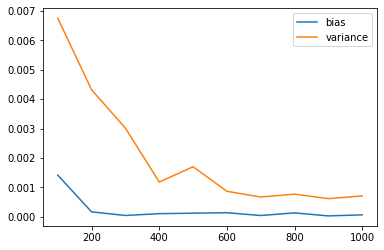

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

n = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
final_bias = []
final_var = []


def linear_regression(X_train, y_train, X_test, y_test):
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]
    w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    y_pred = X_test @ w
    return y_pred


x1t = np.random.uniform(1, 10, 100)
x2t = np.random.uniform(2, 5, 100)
x_test = np.column_stack((x1t, x2t))
y_test = 4+x1t+3*x2t

for num in n:
    x_train = []
    y_train = []
    for i in range(10):
        x1 = np.random.uniform(1, 10, num)
        x2 = np.random.uniform(2, 5, num)
        x = np.column_stack((x1, x2))
        x_train.append(x)
        t = 4+x1+3*x2
        ep = np.random.normal(0, math.sqrt(0.25), num)
        y = t+ep
        y_train.append(y)

    preds = []
    for i in range(10):
        preds.append(linear_regression(x_train[i], y_train[i], x_test, y_test))

    ym_list = []
    for i in range(100):
        ym = (preds[0][i]+preds[1][i]+preds[2][i]+preds[3][i]+preds[4][i] +
              preds[5][i]+preds[6][i]+preds[7][i]+preds[8][i]+preds[9][i])/10
        ym_list.append(ym)

    bias_list = []
    for i in range(100):
        bias = (y_test[i]-ym_list[i])**2
        bias_list.append(bias)

    bias = np.mean(bias_list)
    final_bias.append(bias)

    var_list = []
    for i in range(100):
        var_list.append(sum((preds[j][i]-ym_list[i])**2 for j in range(10))/10)

    var = np.mean(var_list)
    final_var.append(var)

for i in range(10):
    print("n = ", (i+1)*100, "bias = ",
          final_bias[i], "variance = ", final_var[i])

plt.plot(n, final_bias, label='bias')
plt.plot(n, final_var, label='variance')
plt.legend()
plt.show()